# 1. Abstract

The main target of this assignment is utillize deep learning to analyze images, and classify which they are belong to by CNNs. In this model, I select all the jpg images and divide them into test and training and vaildation. Then the following is the detailed model process based on Keras. The classifaction result is valued by the accuracy and loss.

# 2.Deep learning with CNNs

Part A -  Deep learning model

In [2]:
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as k

from keras.models import load_model
from keras.preprocessing import image
import numpy as np
import tensorflow as tf
from os import listdir
from os.path import isfile, join

In [3]:
img_width = 150
img_height = 150

train_data_dir = 'training'
validation_data_dir = 'validation'
train_samples = 120
validation_samples = 30
epochs = 8
batch_size = 20

In [4]:
# Check for Tensorflow
if k.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

In [5]:
model = Sequential()
# Conv2D : Two dimenstional convulational model.
model.add(Conv2D(32,(3,3), input_shape = input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(32,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Flatten()) # Output convert into one dimension layer and will go to Dense layer
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

2022-04-03 20:33:43.459579: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [6]:
import keras
from keras import optimizers
model.compile(loss='binary_crossentropy', 
              optimizer = tf.keras.optimizers.Adam(learning_rate=.001),
              metrics=['accuracy'])

In [7]:
# Data Augmentation is a method of artificially creating a new dataset for training from 
# the existing training dataset to improve the performance of deep learning neural network 
# with the amount of data available. It is a form of regularization which makes our model generalize better than before.

train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

In [8]:
# this is the augmentation configuration use for testing:
# only rescaling, avoiding having same training and validation data.
test_datagen = ImageDataGenerator(rescale=1. / 255)


In [9]:
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 1893 images belonging to 2 classes.


In [10]:
print(train_generator.class_indices)

{'digimon': 0, 'pokemon': 1}


In [11]:
imgs, labels = next(train_generator)

In [12]:
from skimage import io

def imshow(image_RGB):
    io.imshow(image_RGB)
    io.show()

0.0


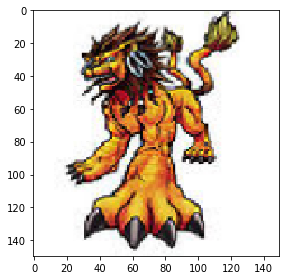

1.0


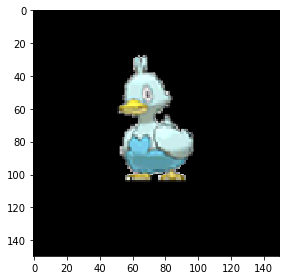

0.0


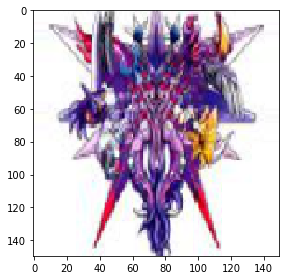

0.0


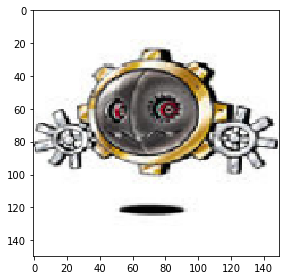

0.0


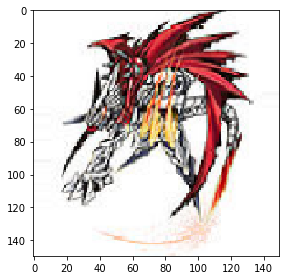

0.0


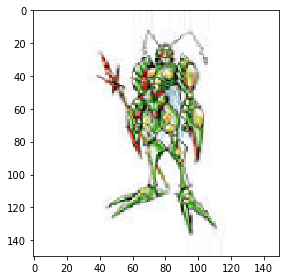

1.0


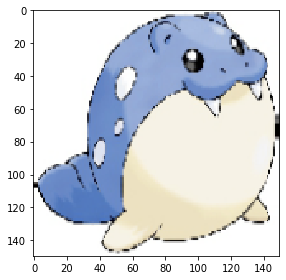

0.0


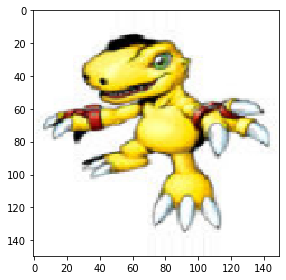

0.0


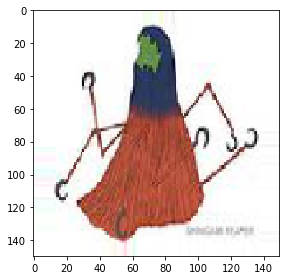

0.0


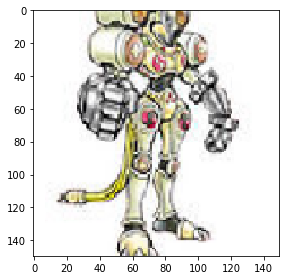

0.0


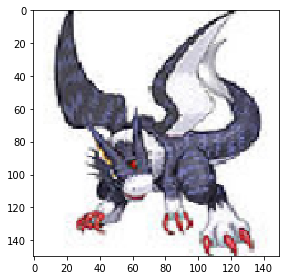

0.0


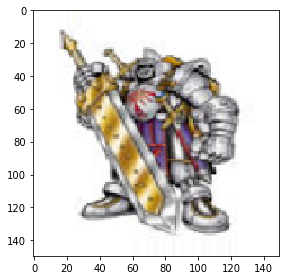

0.0


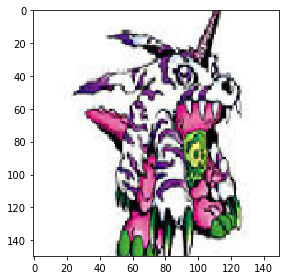

1.0


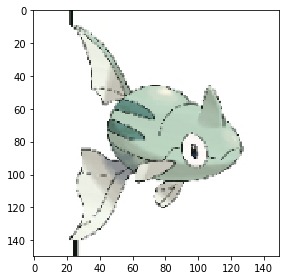

0.0


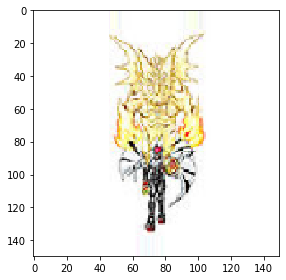

1.0


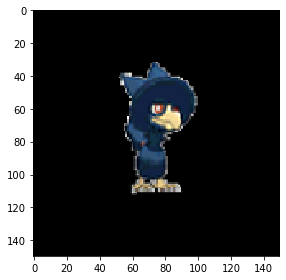

0.0


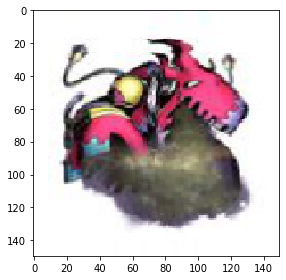

0.0


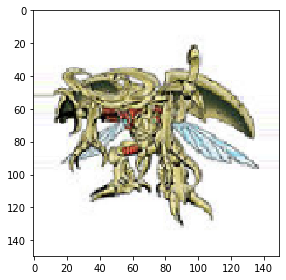

1.0


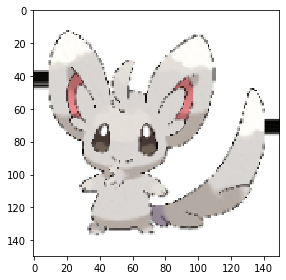

1.0


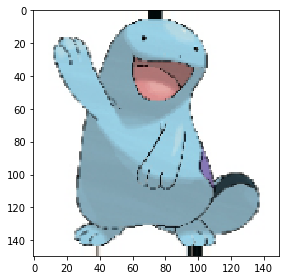

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
image_batch,label_batch = train_generator.next()

#print(len(image_batch))
for i in range(0,len(image_batch)):
    image = image_batch[i]
    print(label_batch[i])
    imshow(image)

In [14]:
validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 56 images belonging to 2 classes.


In [15]:
#In fit_generator() the x and y directly come from a generator.
history = model.fit(
    train_generator,
    steps_per_epoch=train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_samples // batch_size)


Epoch 1/8
1/6 [====>.........................] - ETA: 2s - loss: 0.6913 - accuracy: 0.5000

/opt/anaconda3/lib/python3.9/site-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


6/6 [==============================] - 2s 204ms/step - loss: 0.6904 - accuracy: 0.5583 - val_loss: 0.3507 - val_accuracy: 0.9500
Epoch 2/8
6/6 [==============================] - 1s 179ms/step - loss: 0.6235 - accuracy: 0.6917 - val_loss: 0.2921 - val_accuracy: 0.9000
Epoch 3/8
6/6 [==============================] - 1s 181ms/step - loss: 0.5629 - accuracy: 0.6667 - val_loss: 0.2051 - val_accuracy: 0.9500
Epoch 4/8
6/6 [==============================] - 1s 186ms/step - loss: 0.5275 - accuracy: 0.7167 - val_loss: 0.1491 - val_accuracy: 1.0000
Epoch 5/8
6/6 [==============================] - 1s 170ms/step - loss: 0.5414 - accuracy: 0.7083 - val_loss: 0.2980 - val_accuracy: 0.9000
Epoch 6/8
6/6 [==============================] - 1s 174ms/step - loss: 0.5236 - accuracy: 0.6667 - val_loss: 0.1821 - val_accuracy: 1.0000
Epoch 7/8
6/6 [==============================] - 1s 181ms/step - loss: 0.4247 - accuracy: 0.7667 - val_loss: 0.2270 - val_accuracy: 0.9000
Epoch 8/8
6/6 [======================

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


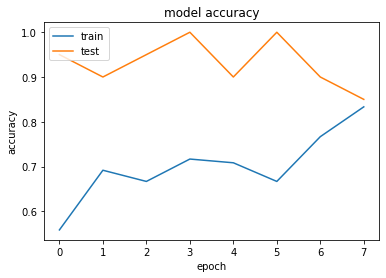

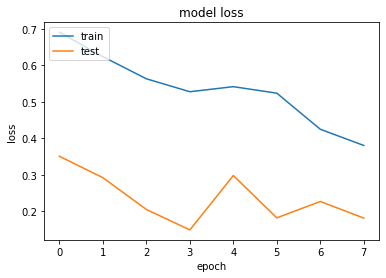

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [17]:
# Now Predict
predict_dir_path='test/'
files = [f for f in listdir(predict_dir_path) if isfile(join(predict_dir_path, f))]
print(files)

['petilil.png', '120px-Sunmon.jpg', 'poliwrath.png', 'phanpy.png', '120px-Stegomon.jpg', '120px-Stingmon.jpg', '120px-Storabimon.jpg', '120px-Starmons.jpg', 'pignite.png', 'pikachu.png', 'piloswine.png', 'pidgeotto.png', 'pineco.png', '120px-Spamon.jpg', 'pinsir.png', '120px-Sukasimon.jpg', '120px-Splashmon_darkness2.jpg', 'pheromosa.jpg', 'persian.png', '120px-Starmon.jpg', 'pikipek.jpg', '120px-Suijinmon.jpg', 'pelipper.png', 'poliwhirl.png', 'poipole.jpg', '120px-Soundbirdmon.jpg', 'plusle.png', 'poliwag.png', '120px-Sunflowmon.jpg', 'pidgeot.png', 'pichu.png', 'politoed.png', '120px-Strikedramon.jpg', '120px-Sparrowmon2.jpg', '120px-Starmon_x.jpg', '120px-Spinomon.jpg', 'phantump.png', '120px-Sukamondaiou.png', '120px-Star_sword.gif', '120px-Soulmon.jpg']


In [18]:
# predicting images
from keras.preprocessing import image
digimon_counter  = 0
pokemon_counter = 0 
for file in files:
    img = image.load_img(predict_dir_path+file, target_size=(img_width, img_height))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    
    images = np.vstack([x])
    predictx = model.predict(images)
    
    if predictx == 0:
        print(file + ": " + 'digimon')
        digimon_counter += 1
    else:
        print(file + ": " + 'pokemon')
        pokemon_counter += 1
print("Total Digimons :",digimon_counter)
print("Total Pokemons :",pokemon_counter)

petilil.png: pokemon
120px-Sunmon.jpg: pokemon
poliwrath.png: pokemon
phanpy.png: pokemon
120px-Stegomon.jpg: digimon
120px-Stingmon.jpg: digimon
120px-Storabimon.jpg: digimon
120px-Starmons.jpg: digimon
pignite.png: pokemon
pikachu.png: pokemon
piloswine.png: pokemon
pidgeotto.png: pokemon
pineco.png: pokemon
120px-Spamon.jpg: digimon
pinsir.png: pokemon
120px-Sukasimon.jpg: digimon
120px-Splashmon_darkness2.jpg: digimon
pheromosa.jpg: pokemon
persian.png: pokemon
120px-Starmon.jpg: digimon
pikipek.jpg: pokemon
120px-Suijinmon.jpg: digimon
pelipper.png: pokemon
poliwhirl.png: pokemon
poipole.jpg: pokemon
120px-Soundbirdmon.jpg: digimon
plusle.png: pokemon
poliwag.png: pokemon
120px-Sunflowmon.jpg: digimon
pidgeot.png: pokemon
pichu.png: pokemon
politoed.png: pokemon
120px-Strikedramon.jpg: digimon
120px-Sparrowmon2.jpg: digimon
120px-Starmon_x.jpg: digimon
120px-Spinomon.jpg: digimon
phantump.png: pokemon
120px-Sukamondaiou.png: pokemon
120px-Star_sword.gif: pokemon
120px-Soulmon.jpg:

PartB - activation function

I change the activation function to tanh.

In [19]:
model = Sequential()
# Conv2D : Two dimenstional convulational model.
# 32 : Input for next layer
# (3,3) convulonational windows size
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('tanh'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('tanh'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('tanh'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten()) # Output convert into one dimension layer and will go to Dense layer
model.add(Dense(64))
model.add(Activation('tanh'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [20]:
from keras import optimizers
model.compile(loss='binary_crossentropy', 
              optimizer = tf.keras.optimizers.Adam(learning_rate=.0001),
              metrics=['accuracy'])

train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 1893 images belonging to 2 classes.


In [21]:
imgs, labels = next(train_generator)

def imshow(image_RGB):
    io.imshow(image_RGB)
    io.show()

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')
    

Found 56 images belonging to 2 classes.


In [22]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_samples // batch_size)

Epoch 1/8
6/6 [==============================] - 1s 179ms/step - loss: 0.6997 - accuracy: 0.5833 - val_loss: 0.4694 - val_accuracy: 0.9000
Epoch 2/8
6/6 [==============================] - 1s 167ms/step - loss: 0.6303 - accuracy: 0.6917 - val_loss: 0.2630 - val_accuracy: 1.0000
Epoch 3/8
6/6 [==============================] - 1s 164ms/step - loss: 0.6191 - accuracy: 0.6833 - val_loss: 0.3339 - val_accuracy: 0.9500
Epoch 4/8
6/6 [==============================] - 1s 175ms/step - loss: 0.5497 - accuracy: 0.7083 - val_loss: 0.2354 - val_accuracy: 0.9500
Epoch 5/8
6/6 [==============================] - 1s 178ms/step - loss: 0.6975 - accuracy: 0.6417 - val_loss: 0.4000 - val_accuracy: 0.8000
Epoch 6/8
6/6 [==============================] - 1s 179ms/step - loss: 0.5311 - accuracy: 0.7333 - val_loss: 0.3043 - val_accuracy: 0.9500
Epoch 7/8
6/6 [==============================] - 1s 175ms/step - loss: 0.5230 - accuracy: 0.7417 - val_loss: 0.1791 - val_accuracy: 1.0000
Epoch 8/8
6/6 [============

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


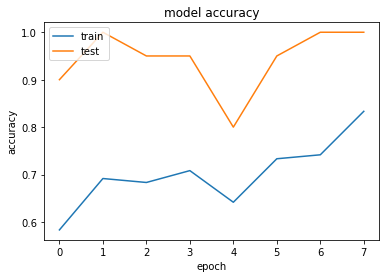

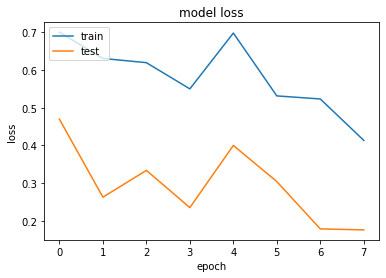

In [23]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Compared with part A, tanh makes training and testing accuracy curve growing and loss decreased. The lowest of tarining accuracy is 4.

Part C - Cost Function

change the cost function from binary_crossentropy to mean_squared_error

In [24]:
model = Sequential()
# Conv2D : Two dimenstional convulational model.
# 32 : Input for next layer
# (3,3) convulonational windows size
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten()) # Output convert into one dimension layer and will go to Dense layer
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='mean_squared_error', 
              optimizer = tf.keras.optimizers.Adam(learning_rate=.0001),
              metrics=['accuracy'])

train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 1893 images belonging to 2 classes.


In [25]:
imgs, labels = next(train_generator)

def imshow(image_RGB):
    io.imshow(image_RGB)
    io.show()

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 56 images belonging to 2 classes.


In [26]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_samples // batch_size)


Epoch 1/8
6/6 [==============================] - 1s 174ms/step - loss: 0.2574 - accuracy: 0.5417 - val_loss: 0.1810 - val_accuracy: 0.9000
Epoch 2/8
6/6 [==============================] - 1s 168ms/step - loss: 0.2309 - accuracy: 0.6500 - val_loss: 0.2012 - val_accuracy: 0.9000
Epoch 3/8
6/6 [==============================] - 1s 166ms/step - loss: 0.2320 - accuracy: 0.6833 - val_loss: 0.1637 - val_accuracy: 0.9500
Epoch 4/8
6/6 [==============================] - 1s 157ms/step - loss: 0.2070 - accuracy: 0.7333 - val_loss: 0.1447 - val_accuracy: 0.9000
Epoch 5/8
6/6 [==============================] - 1s 164ms/step - loss: 0.2261 - accuracy: 0.6500 - val_loss: 0.1150 - val_accuracy: 0.9500
Epoch 6/8
6/6 [==============================] - 1s 162ms/step - loss: 0.2180 - accuracy: 0.6417 - val_loss: 0.1513 - val_accuracy: 0.8500
Epoch 7/8
6/6 [==============================] - 1s 170ms/step - loss: 0.2260 - accuracy: 0.5833 - val_loss: 0.1442 - val_accuracy: 0.9000
Epoch 8/8
6/6 [============

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


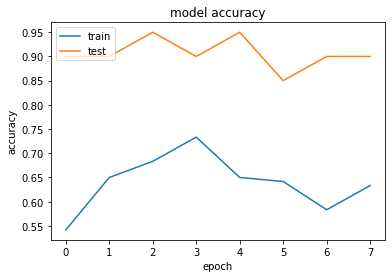

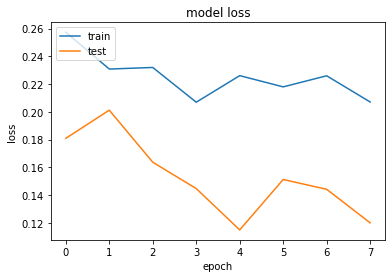

In [27]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Compared with part A, change to mean_squared_error makes accuracy lower. And the model loss average became lower as the epoch grows up. In other words, the mean_squared_error fit this model as well.

Part D - Epochs

Change epoch initialization form 8 to 20

In [28]:
train_samples = 120
validation_samples = 30
epochs = 20
batch_size = 20

# Check for TensorFlow or Thieno
if k.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

model = Sequential()
# Conv2D : Two dimenstional convulational model.
# 32 : Input for next layer
# (3,3) convulonational windows size
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten()) # Output convert into one dimension layer and will go to Dense layer
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy', 
              optimizer = tf.keras.optimizers.Adam(learning_rate=.0001),
              metrics=['accuracy'])

train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 1893 images belonging to 2 classes.


In [29]:
imgs, labels = next(train_generator)

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')


Found 56 images belonging to 2 classes.


In [30]:
#In fit_generator(), you don't pass the x and y directly, instead they come from a generator.
history = model.fit(
    train_generator,
    steps_per_epoch=train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_samples // batch_size)

Epoch 1/20
6/6 [==============================] - 1s 179ms/step - loss: 0.6967 - accuracy: 0.5417 - val_loss: 0.6249 - val_accuracy: 0.8000
Epoch 2/20
6/6 [==============================] - 1s 157ms/step - loss: 0.6655 - accuracy: 0.6583 - val_loss: 0.5921 - val_accuracy: 0.9500
Epoch 3/20
6/6 [==============================] - 1s 166ms/step - loss: 0.6875 - accuracy: 0.6000 - val_loss: 0.5432 - val_accuracy: 0.9000
Epoch 4/20
6/6 [==============================] - 1s 165ms/step - loss: 0.6723 - accuracy: 0.6083 - val_loss: 0.5306 - val_accuracy: 0.9000
Epoch 5/20
6/6 [==============================] - 1s 167ms/step - loss: 0.6061 - accuracy: 0.7000 - val_loss: 0.4741 - val_accuracy: 0.9000
Epoch 6/20
6/6 [==============================] - 1s 164ms/step - loss: 0.6376 - accuracy: 0.6333 - val_loss: 0.4232 - val_accuracy: 1.0000
Epoch 7/20
6/6 [==============================] - 1s 167ms/step - loss: 0.6222 - accuracy: 0.6083 - val_loss: 0.4417 - val_accuracy: 0.9000
Epoch 8/20
6/6 [====

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


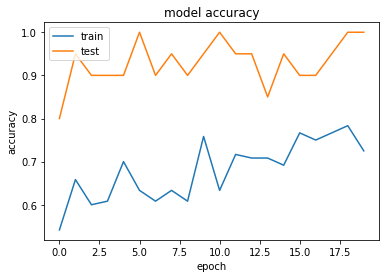

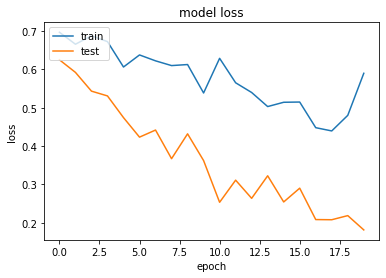

In [31]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Compared with part A, make epochs bigger can get a higher accuracy, but it is not stable and the average is not get a significant improvement. In the long run, the effect is not as ideal as expected.Loss curve goes down and has a highest value at epoch 15 for testing. All in all, growing epoch is helpful to get a good loss.

Part E - Gradient estimation

Change the gradient estimation from ADAMN to Stochastic Gradient Descent

In [32]:
train_samples = 120
validation_samples = 30
epochs = 8
batch_size = 20

# Check for TensorFlow or Thieno
if k.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

model = Sequential()
# Conv2D : Two dimenstional convulational model.
# 32 : Input for next layer
# (3,3) convulonational windows size
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten()) # Output convert into one dimension layer and will go to Dense layer
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy', 
              optimizer = tf.keras.optimizers.SGD(learning_rate=.0001),
              metrics=['accuracy'])

train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 1893 images belonging to 2 classes.


In [33]:
imgs, labels = next(train_generator)

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 56 images belonging to 2 classes.


In [34]:
#In fit_generator(), you don't pass the x and y directly, instead they come from a generator.
history = model.fit(
    train_generator,
    steps_per_epoch=train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_samples // batch_size)

Epoch 1/8
6/6 [==============================] - 1s 173ms/step - loss: 0.6717 - accuracy: 0.6417 - val_loss: 0.6788 - val_accuracy: 0.7500
Epoch 2/8
6/6 [==============================] - 1s 163ms/step - loss: 0.6942 - accuracy: 0.4917 - val_loss: 0.6651 - val_accuracy: 0.7500
Epoch 3/8
6/6 [==============================] - 1s 157ms/step - loss: 0.6709 - accuracy: 0.6372 - val_loss: 0.6805 - val_accuracy: 0.7000
Epoch 4/8
6/6 [==============================] - 1s 175ms/step - loss: 0.6935 - accuracy: 0.5750 - val_loss: 0.6634 - val_accuracy: 0.8500
Epoch 5/8
6/6 [==============================] - 1s 170ms/step - loss: 0.6873 - accuracy: 0.5752 - val_loss: 0.6673 - val_accuracy: 0.7500
Epoch 6/8
6/6 [==============================] - 1s 173ms/step - loss: 0.6729 - accuracy: 0.6417 - val_loss: 0.6498 - val_accuracy: 0.8000
Epoch 7/8
6/6 [==============================] - 1s 166ms/step - loss: 0.7116 - accuracy: 0.4500 - val_loss: 0.6387 - val_accuracy: 0.9500
Epoch 8/8
6/6 [============

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


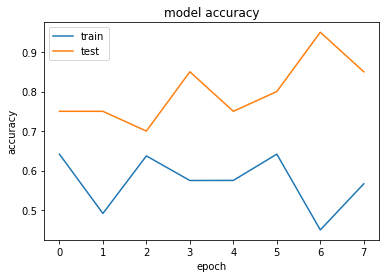

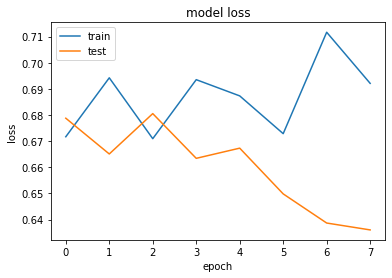

In [35]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Compared with part A, changed the gradient estimation makes training accuracy keeps at 0.5. And the model loss keeps high from the beginning to the end. So Stochastic Gradient Descent dose not fit this model as well. 

Part F - Network architecture

Change the network architecture by adding more number of layers for this model.

In [36]:
train_samples = 120
validation_samples = 30
epochs = 8
batch_size = 20

# Check for TensorFlow or Thieno
if k.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

model = Sequential()
# Conv2D : Two dimenstional convulational model.
# 32 : Input for next layer
# (3,3) convulonational windows size
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten()) # Output convert into one dimension layer and will go to Dense layer
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy', 
              optimizer = tf.keras.optimizers.Adam(learning_rate=.0001),
              metrics=['accuracy'])

train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 1893 images belonging to 2 classes.


In [37]:
imgs, labels = next(train_generator)

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 56 images belonging to 2 classes.


In [38]:
imgs, labels = next(train_generator)

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 56 images belonging to 2 classes.


In [39]:
#In fit_generator(), you don't pass the x and y directly, instead they come from a generator.
history = model.fit(
    train_generator,
    steps_per_epoch=train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_samples // batch_size)

Epoch 1/8
6/6 [==============================] - 1s 174ms/step - loss: 0.6854 - accuracy: 0.5583 - val_loss: 0.7061 - val_accuracy: 0.4000
Epoch 2/8
6/6 [==============================] - 1s 160ms/step - loss: 0.7090 - accuracy: 0.4833 - val_loss: 0.6671 - val_accuracy: 0.6000
Epoch 3/8
6/6 [==============================] - 1s 155ms/step - loss: 0.6944 - accuracy: 0.5167 - val_loss: 0.6606 - val_accuracy: 0.5500
Epoch 4/8
6/6 [==============================] - 1s 158ms/step - loss: 0.6790 - accuracy: 0.5917 - val_loss: 0.6742 - val_accuracy: 0.8000
Epoch 5/8
6/6 [==============================] - 1s 163ms/step - loss: 0.6854 - accuracy: 0.5667 - val_loss: 0.6683 - val_accuracy: 0.7000
Epoch 6/8
6/6 [==============================] - 1s 161ms/step - loss: 0.6769 - accuracy: 0.6167 - val_loss: 0.6277 - val_accuracy: 1.0000
Epoch 7/8
6/6 [==============================] - 1s 177ms/step - loss: 0.6637 - accuracy: 0.6500 - val_loss: 0.6337 - val_accuracy: 0.9000
Epoch 8/8
6/6 [============

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


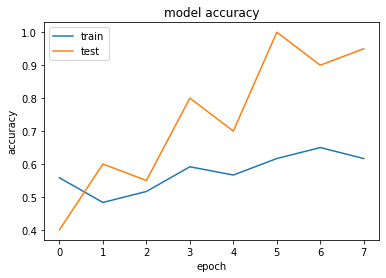

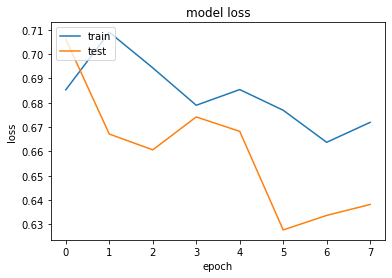

In [40]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Compared with part A, changing to network architecture by adding more layers makes both curves fluctuation large and intense. Especially testing curves. As the epoch grow the loss getting down, but its value is still high.

Part G - Network initialization
Change the network initialization from defualt glorot_uniform to he_normal

In [41]:
from keras import initializers

train_samples = 120
validation_samples = 30
epochs = 8
batch_size = 20

# Check for TensorFlow or Thieno
if k.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

model = Sequential()
# Conv2D : Two dimenstional convulational model.
# 32 : Input for next layer
# (3,3) convulonational windows size
# The kernel_initializer defaults to glorot_uniform, change it to he_normal
model.add(Conv2D(32, (3, 3), input_shape=input_shape, kernel_initializer="he_normal", bias_initializer="zeros"))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3), kernel_initializer="he_normal"))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), kernel_initializer="he_normal"))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten()) # Output convert into one dimension layer and will go to Dense layer
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy', 
              optimizer = tf.keras.optimizers.Adam(learning_rate=.0001),
              metrics=['accuracy'])

train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 1893 images belonging to 2 classes.


In [42]:
imgs, labels = next(train_generator)

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

#In fit_generator(), you don't pass the x and y directly, instead they come from a generator.
history = model.fit(
    train_generator,
    steps_per_epoch=train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_samples // batch_size)

Found 56 images belonging to 2 classes.
Epoch 1/8
6/6 [==============================] - 1s 191ms/step - loss: 0.7903 - accuracy: 0.5575 - val_loss: 0.5189 - val_accuracy: 0.8000
Epoch 2/8
6/6 [==============================] - 1s 167ms/step - loss: 0.7405 - accuracy: 0.6583 - val_loss: 0.3876 - val_accuracy: 0.8500
Epoch 3/8
6/6 [==============================] - 1s 168ms/step - loss: 0.6378 - accuracy: 0.6750 - val_loss: 0.3750 - val_accuracy: 0.8000
Epoch 4/8
6/6 [==============================] - 1s 165ms/step - loss: 0.6054 - accuracy: 0.7080 - val_loss: 0.3230 - val_accuracy: 0.9000
Epoch 5/8
6/6 [==============================] - 1s 169ms/step - loss: 0.5992 - accuracy: 0.6083 - val_loss: 0.4343 - val_accuracy: 0.9500
Epoch 6/8
6/6 [==============================] - 1s 162ms/step - loss: 0.5825 - accuracy: 0.6917 - val_loss: 0.2707 - val_accuracy: 0.9500
Epoch 7/8
6/6 [==============================] - 1s 160ms/step - loss: 0.5220 - accuracy: 0.7083 - val_loss: 0.3428 - val_accu

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


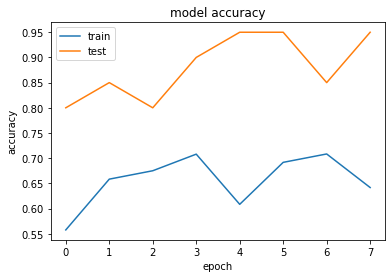

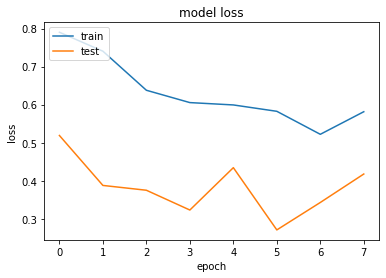

In [43]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Compared to Part A, changing the network initialization does't imporve accuracy well. For training data, accuracy curve has highest value at epoch 4 and both training and testing have a decrased trend at last. So changing initialization to he_normal is not very effective to imporve accuracy.

# Conclusion

In the beginning, the accuracy is around 0.9, which is ideal. But, we can still imporve the accuracy result and get much better classification by some methods such as changing activation function, adding epochs and so on.

**15. Licensing.**

Copyright 2022 Zeen Wang

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.